In [160]:
import pandas as pd 
# For data manipulation and analysis, especially for handling CSV files containing rock drill sensor data
import numpy as np
# For numerical operations, such as calculating statistical features from the sensor data
import matplotlib.pyplot as plt
# For graphing data distribution, time series plots and feature visualization (ex. mean, min, variance, max)
import seaborn as sns
# For creating statistical plots


from sklearn.preprocessing import StandardScaler
 # For normalizing the sensor data to ensure consistent scales
from sklearn.model_selection import train_test_split
# For splitting the data into training and validation sets to evaluate the model
from sklearn.ensemble import RandomForestClassifier
# For building the fault classification model using an ensemble of decision trees
from sklearn.metrics import accuracy_score
# For evaluating the performance of the classification model
from sklearn.metrics import confusion_matrix
# For allowing visualization of the performance of the algorithm
from sklearn.model_selection import cross_val_score
# For evaluating the validity of accuracy scores 

#Imported pandas, numpy and matplot to visualize data
#Downloading of python and jupyter libraries is neccesary


In [139]:
final_data = pd.read_csv('/Users//sarithavuppula//Downloads/Summer School/final_version_data.csv')
#Command to read using pandas, read final version data csv, file name attached inside, execute using control enter

# Load training and testing data with error handling for bad lines
try:
    # Load the training data for the rock drill fault classification, skipping bad lines to handle any format inconsistencies
    data_pdmp1 = pd.read_csv('/Users/sarithavuppula/Downloads/Data_Challenge_PHM2022_training_data/data_pdmp1.csv', on_bad_lines='skip')
    # Load the testing data for the rock drill fault classification, skipping bad lines to handle any format inconsistencies
    data_pdmp3 = pd.read_csv('/Users/sarithavuppula/Downloads/Data_Challenge_PHM2022_testing_data/data_pdmp3.csv', on_bad_lines='skip')
except Exception as e:
    print(f"Error loading data: {e}")
    


In [178]:
c1_final_data = final_data[final_data.condition==1]
c1_final_data

Unnamed: 0  condition  cycle      pdmp       pin        po  mode
0                 0          1      0  0.092714 -1.370116 -0.027094     2
1                 1          1      0  0.026824 -1.352096 -0.108993     2
2                 2          1      0 -0.031095 -1.276873 -0.215638     2
3                 3          1      0 -0.076524 -1.205551 -0.360907     2
4                 4          1      0 -0.110287 -1.161170 -0.516623     2
...             ...        ...    ...       ...       ...       ...   ...
5147019     5147019          1    999  0.115294 -1.227565  0.314863     2
5147020     5147020          1    999  0.080038 -1.259951  0.284470     2
5147021     5147021          1    999  0.041823 -1.311392  0.263558     2
5147022     5147022          1    999 -0.000811 -1.338077  0.249828     2
5147023     5147023          1    999 -0.048016 -1.310131  0.234619     2

[5147024 rows x 7 columns]

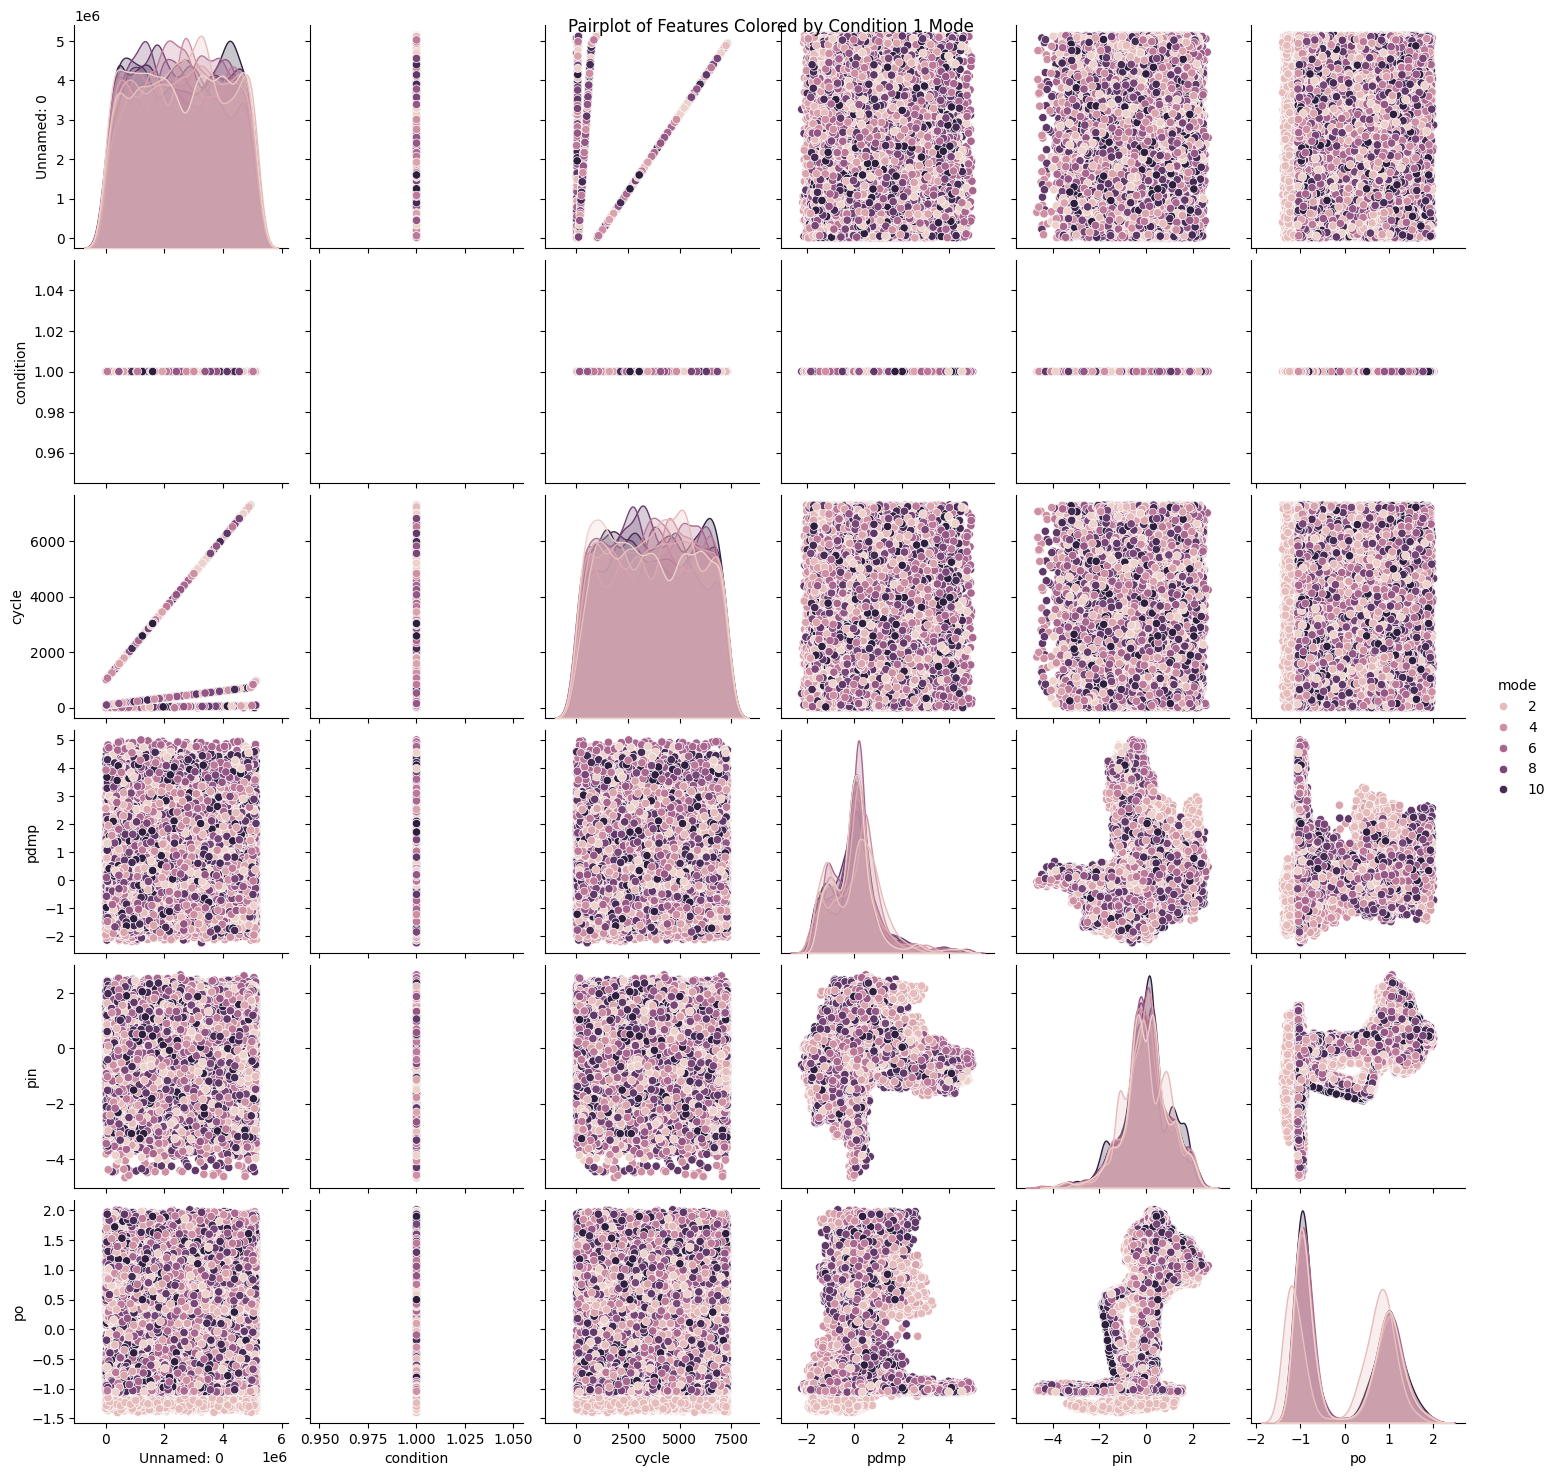

<Figure size 1000x1000 with 0 Axes>

In [181]:
# Sample the data for visualization purposes
data_sample = c1_final_data.sample(n=100000, random_state=42)  # Adjust the sample size as needed

# Visualize the data to see relationships and distributions
sns.pairplot(data_sample, hue='mode')  # Pairplot helps in visualizing the distribution of the data and relationships between features
plt.suptitle('Pairplot of Features Colored by Condition 1 Mode')
plt.figure(figsize=(10,10)) #Changes size of graph
plt.show()


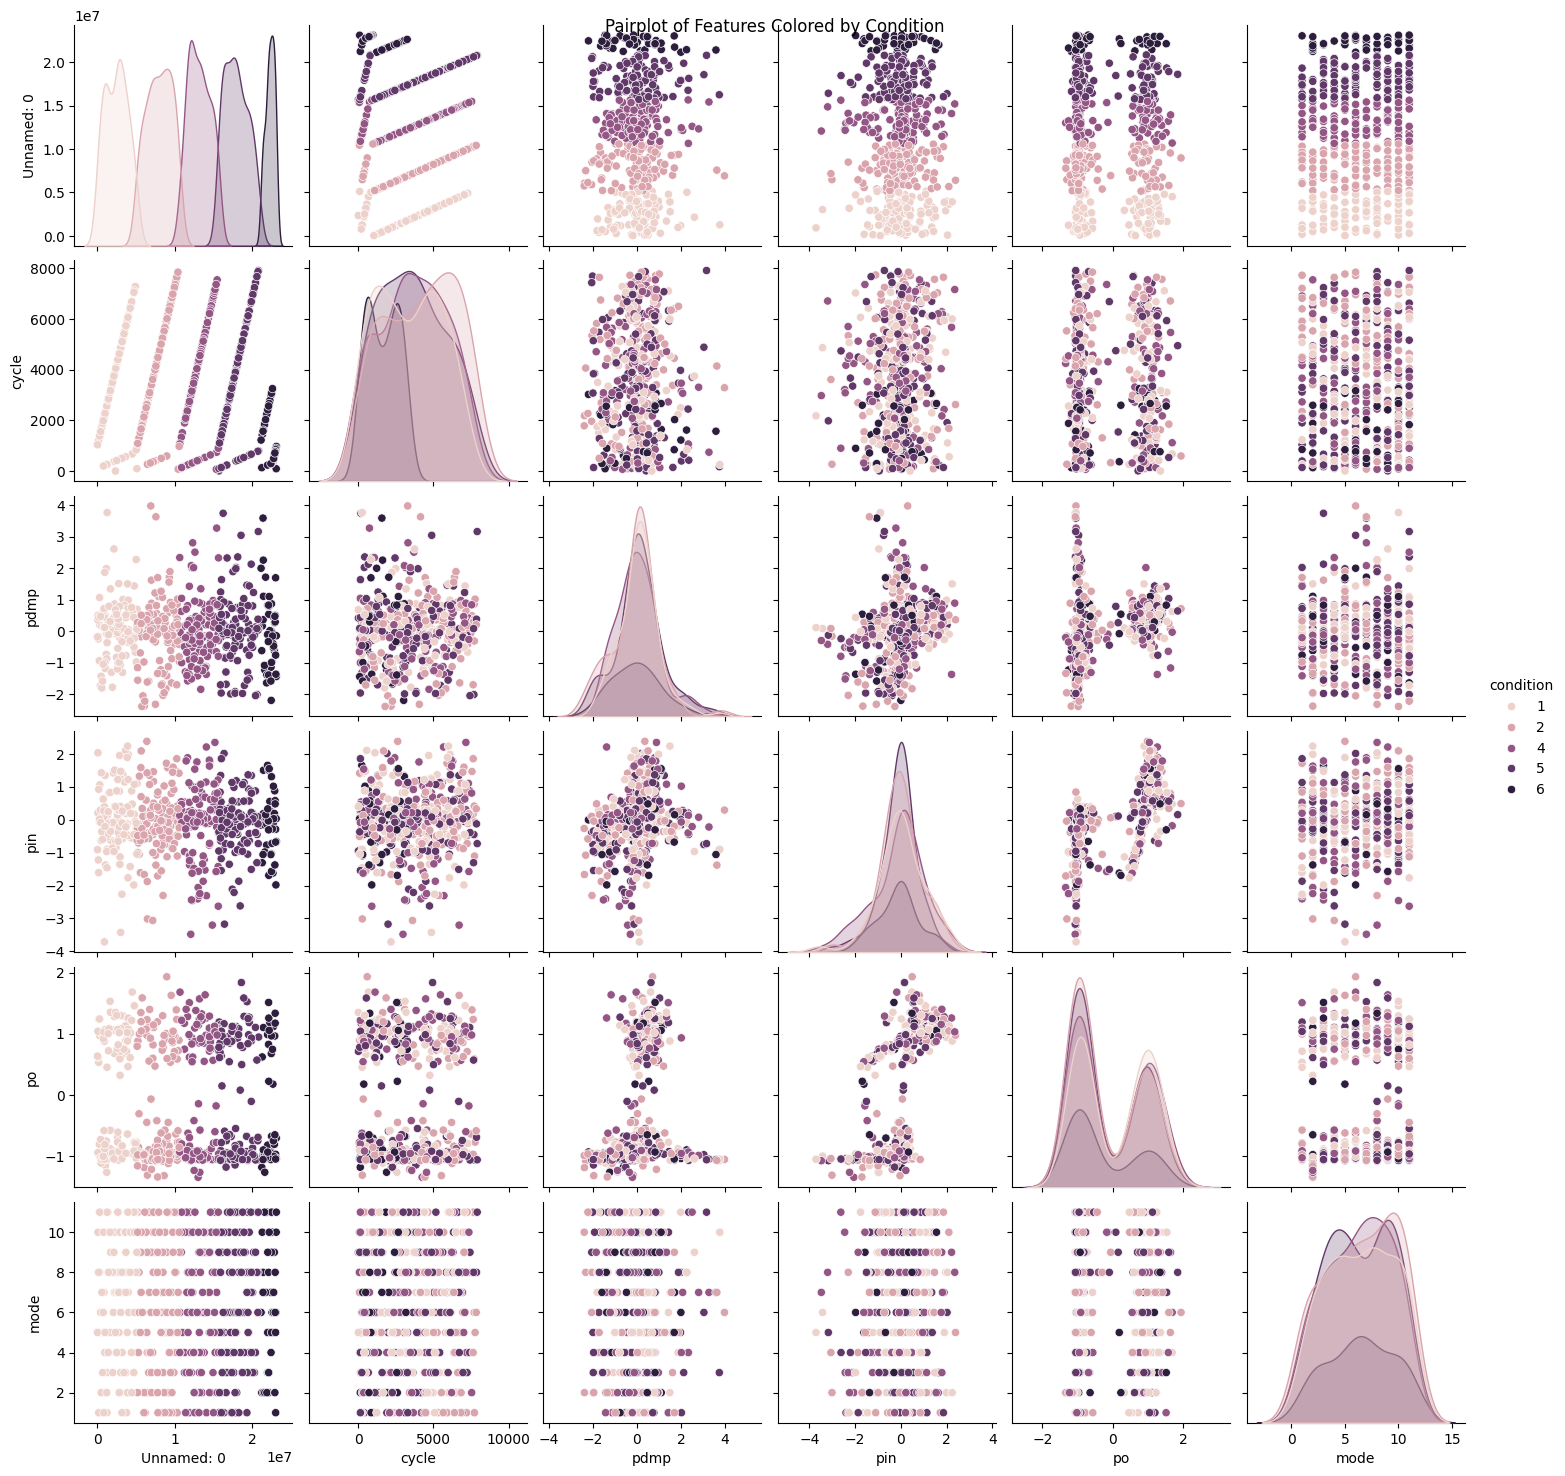

<Figure size 1000x1000 with 0 Axes>

In [176]:
sns.pairplot(data_sample, hue='condition')  # Pairplot helps in visualizing the distribution of the data and relationships between features
plt.suptitle('Pairplot of Features Colored by Condition')
plt.figure(figsize=(10,10)) #Changes size of graph
plt.show()


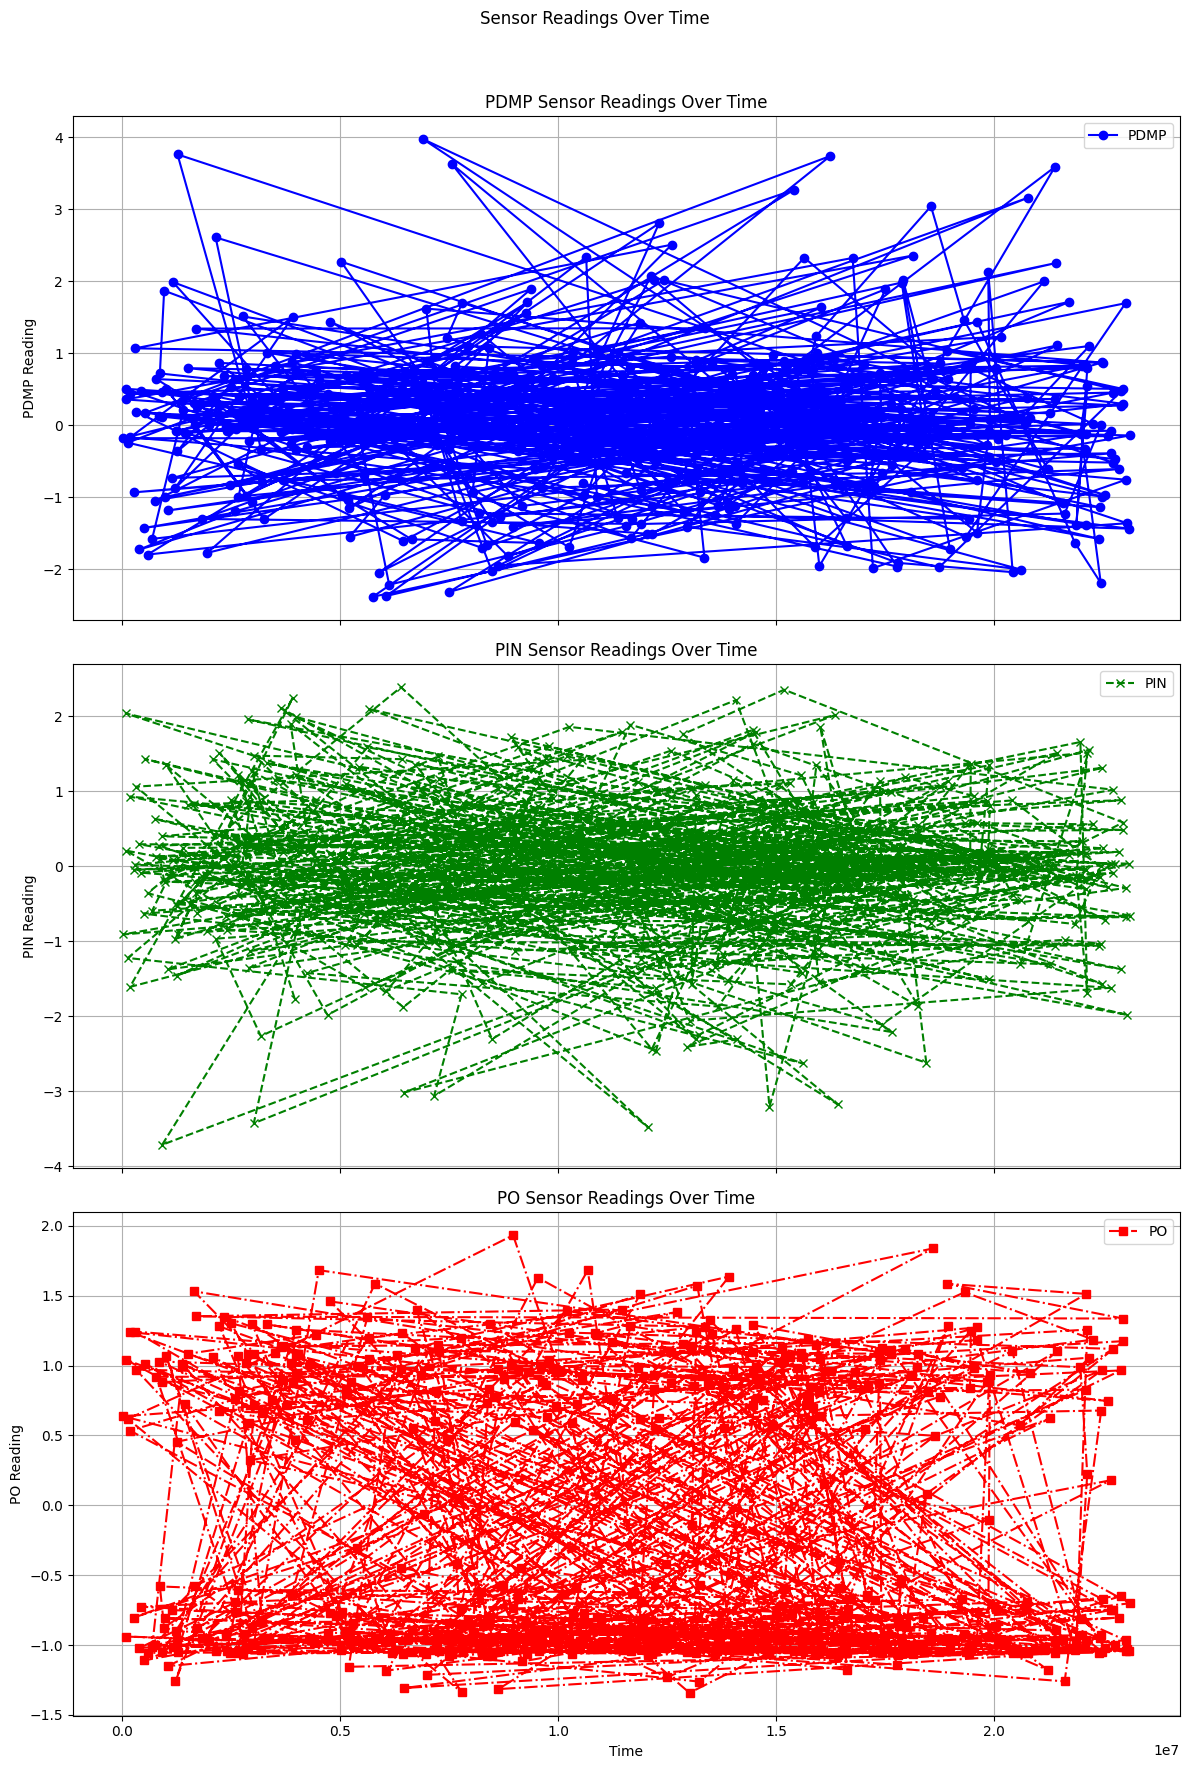

In [172]:
# Line plot to visualize sensor readings over time
def plot_time_series(data_sample, title):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18), sharex=True)
    
    # Plot PDMP sensor readings
    axes[0].plot(data_sample.index, data_sample['pdmp'], label='PDMP', color='b', marker='o', linestyle='-')
    axes[0].set_title('PDMP Sensor Readings Over Time')
    axes[0].set_ylabel('PDMP Reading')
    axes[0].legend()
    axes[0].grid(True)
    
    # Plot PIN sensor readings
    axes[1].plot(data_sample.index, data_sample['pin'], label='PIN', color='g', marker='x', linestyle='--')
    axes[1].set_title('PIN Sensor Readings Over Time')
    axes[1].set_ylabel('PIN Reading')
    axes[1].legend()
    axes[1].grid(True)
    
    # Plot PO sensor readings
    axes[2].plot(data_sample.index, data_sample['po'], label='PO', color='r', marker='s', linestyle='-.')
    axes[2].set_title('PO Sensor Readings Over Time')
    axes[2].set_xlabel('Time')
    axes[2].set_ylabel('PO Reading')
    axes[2].legend()
    axes[2].grid(True)
    
    fig.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot the sensor readings over time to identify patterns and trends
plot_time_series(data_sample, 'Sensor Readings Over Time')

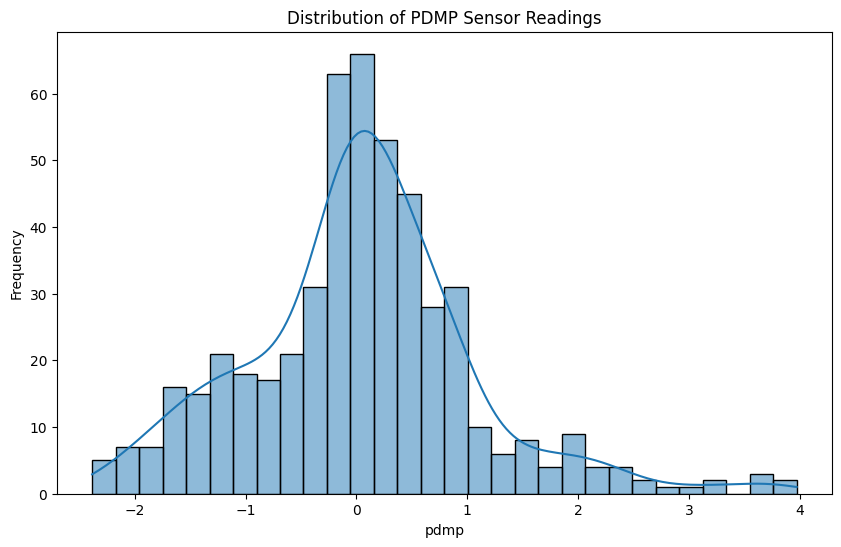

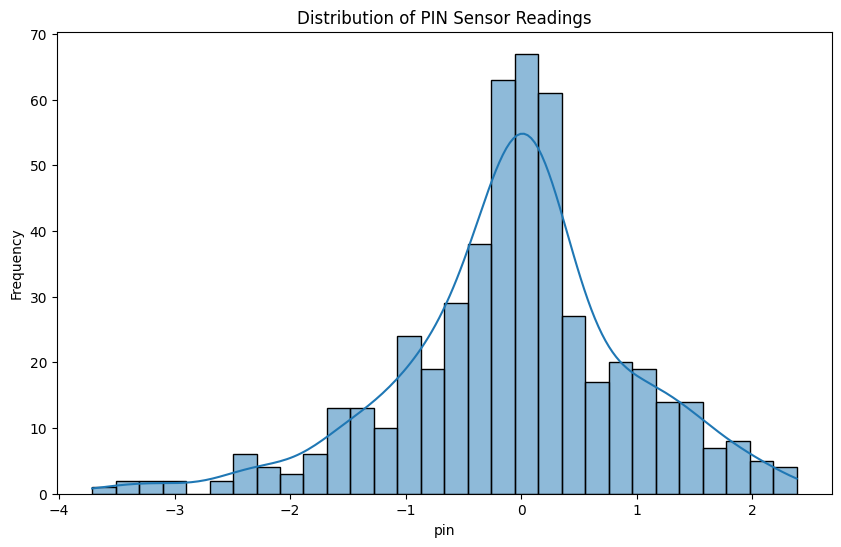

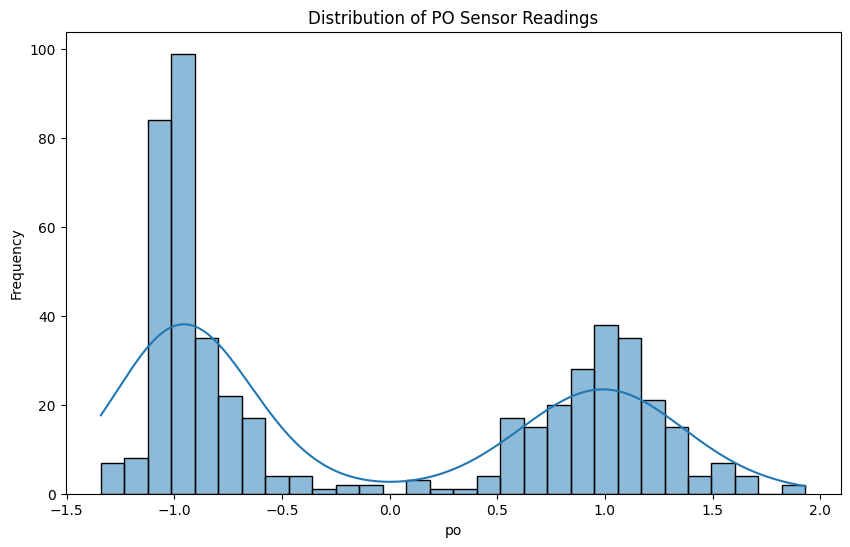

In [167]:
# Histogram to visualize the distribution of sensor readings
def plot_feature_distribution(data_sample, feature, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data_sample[feature], kde=True, bins=30)  # Histogram with KDE to visualize the distribution of a feature
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    
# Plot the distribution of 'pdmp'
plot_feature_distribution(data_sample, 'pdmp', 'Distribution of PDMP Sensor Readings')
# Plot the distribution of 'pin'
plot_feature_distribution(data_sample, 'pin', 'Distribution of PIN Sensor Readings')
# Plot the distribution of 'po'
plot_feature_distribution(data_sample, 'po', 'Distribution of PO Sensor Readings')


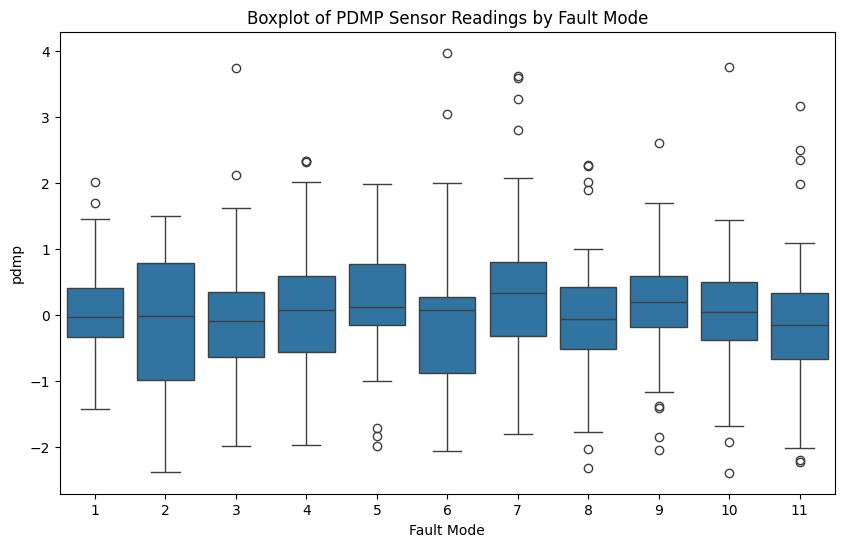

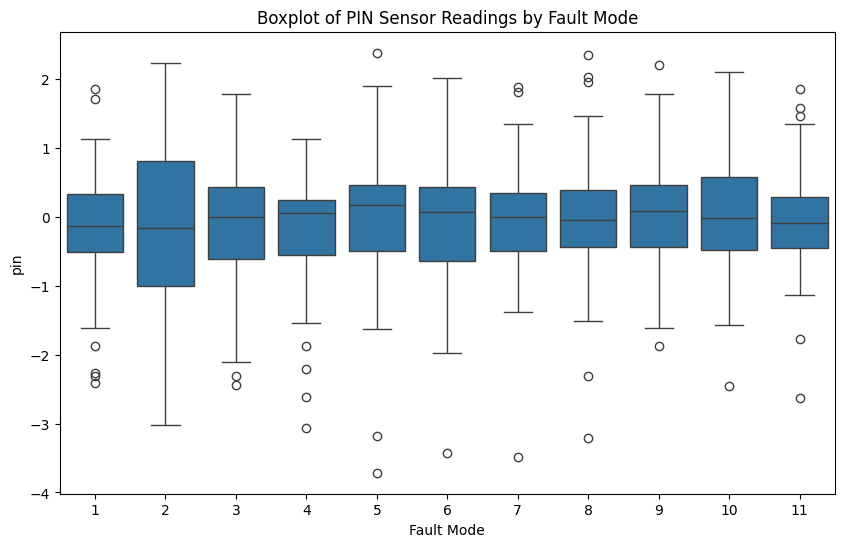

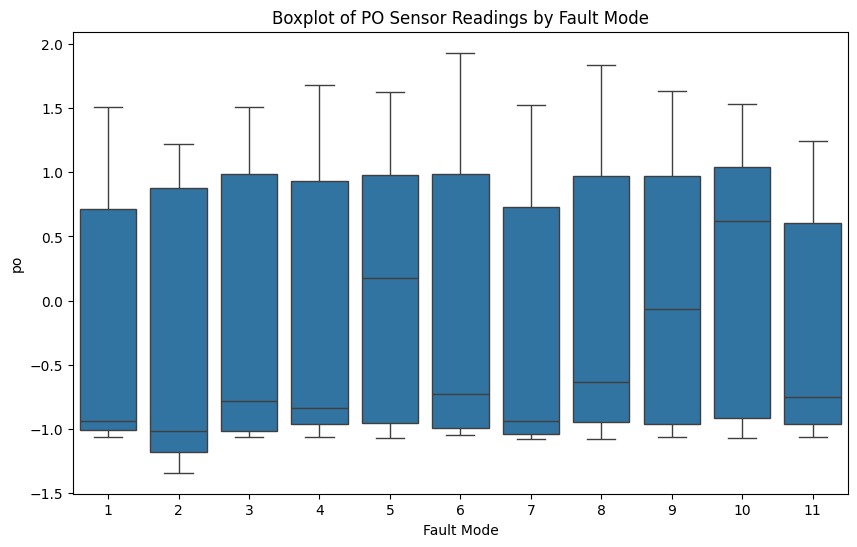

In [169]:
# Box plot to visualize the spread and outliers in sensor readings
def plot_feature_boxplot(data_sample, feature, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='mode', y=feature, data=data_sample)  # Box plot to visualize spread and outliers by mode
    plt.title(title)
    plt.xlabel('Fault Mode')
    plt.ylabel(feature)
    plt.show()

# Plot the box plots for 'pdmp', 'pin', and 'po'
plot_feature_boxplot(data_sample, 'pdmp', 'Boxplot of PDMP Sensor Readings by Fault Mode')
plot_feature_boxplot(data_sample, 'pin', 'Boxplot of PIN Sensor Readings by Fault Mode')
plot_feature_boxplot(data_sample, 'po', 'Boxplot of PO Sensor Readings by Fault Mode')


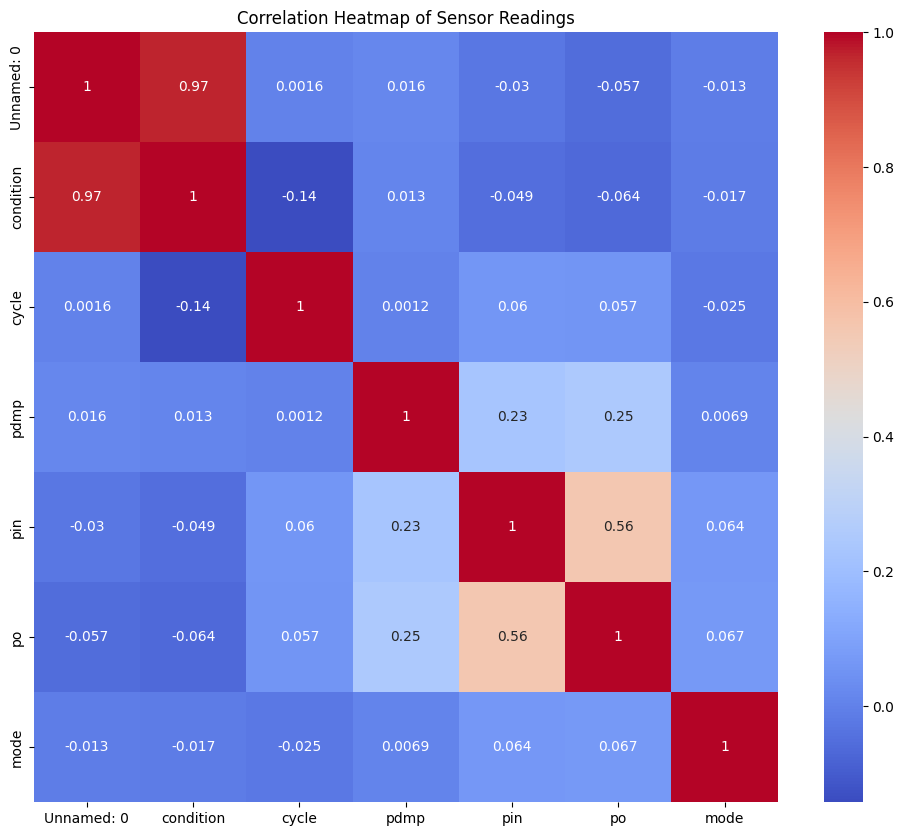

In [171]:
# Correlation heatmap to visualize correlation between different features
plt.figure(figsize=(12, 10))
correlation_matrix = data_sample.corr()  # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Heatmap to visualize the correlation matrix
plt.title('Correlation Heatmap of Sensor Readings')
plt.show()

In [152]:
# Preprocess data by normalizing sensor readings from the rock drills
def preprocess_data(data_sample):
    scaler = StandardScaler()  # Initialize the scaler for normalization to ensure consistent scales
    X = data_sample.iloc[:, 3:]  # Extract sensor data columns (excluding condition, cycle, and mode)
    y = data_sample['mode']  # Extract the label column representing fault classifications
    X_scaled = scaler.fit_transform(X)  # Normalize the sensor data to improve model performance
    return X_scaled, y

# Apply preprocessing to the sample data
X_sample_scaled, y_sample = preprocess_data(data_sample)

In [154]:
# Feature extraction function to derive statistical features from the sensor data
def extract_features(data_sample):
    features = []  # List to hold extracted features
    for index, row in data_sample.iterrows():
        cycle_data = row[3:]  # Extract sensor data from each row (excluding condition, cycle, and mode)
        mean = np.mean(cycle_data)  # Calculate mean of the sensor data, representing average behavior
        var = np.var(cycle_data)  # Calculate variance of the sensor data, indicating variability
        max_val = np.max(cycle_data)  # Find the maximum value in the sensor data, highlighting extreme readings
        min_val = np.min(cycle_data)  # Find the minimum value in the sensor data, highlighting low points
        features.append([mean, var, max_val, min_val])  # Append extracted features to the list
    return np.array(features)

# Extract features from the sample data for fault classification
data_sample_features = extract_features(data_sample)
print("Sample Features Shape:", data_sample_features)

Sample Features Shape: [[-1.79575000e-02  5.30185919e-01  1.00000000e+00 -1.05866000e+00]
 [ 6.26697500e-01  3.88987830e+00  4.00000000e+00 -9.77344000e-01]
 [ 1.65669900e+00  1.85170947e+00  4.00000000e+00  6.95022000e-01]
 ...
 [ 1.48650525e+00  1.44109693e+01  8.00000000e+00 -1.50880200e+00]
 [ 1.67836375e+00  1.87062269e+00  4.00000000e+00  5.34055000e-01]
 [ 2.42088925e+00  2.52240675e+01  1.10000000e+01 -1.76717700e+00]]


In [159]:
# Split the data into training and validation sets to evaluate model performance
X_train, X_val, y_train, y_val = train_test_split(data_sample_features, y_sample, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier for fault classification
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the training split
model.fit(X_train, y_train)

# Validate the model on the validation split to assess its performance on unseen data
y_val_pred = model.predict(X_val)
# Print validation accuracy to evaluate model performance in fault classification
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, data_sample_features, y_sample, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))


Validation Accuracy: 1.0
Cross-Validation Scores: [1.   0.98 1.   1.   1.  ]
Mean CV Score: 0.9960000000000001
Standard Deviation of CV Scores: 0.008000000000000007


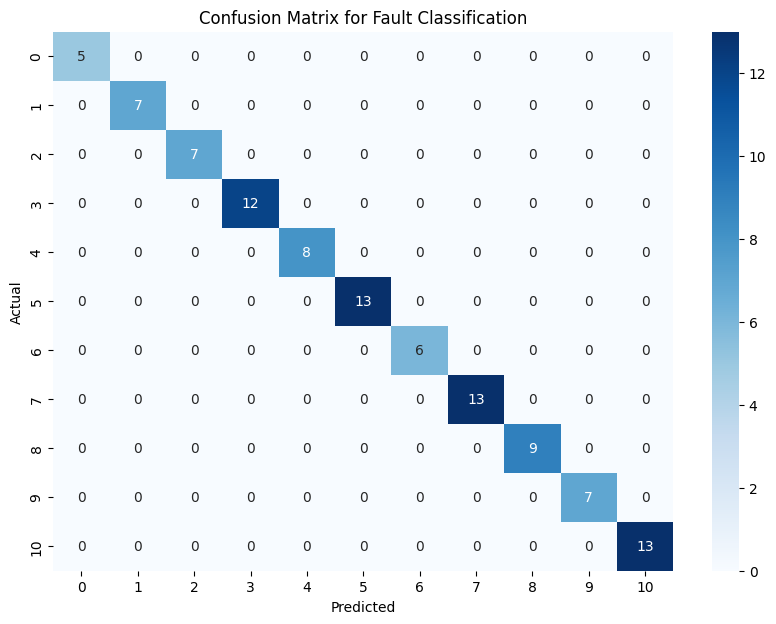

In [161]:
# Plotting the confusion matrix to understand the classification performance
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)  # Compute confusion matrix to evaluate the accuracy of a classification
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Heatmap to visualize the confusion matrix
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example plot of confusion matrix
plot_confusion_matrix(y_val, y_val_pred, 'Confusion Matrix for Fault Classification')


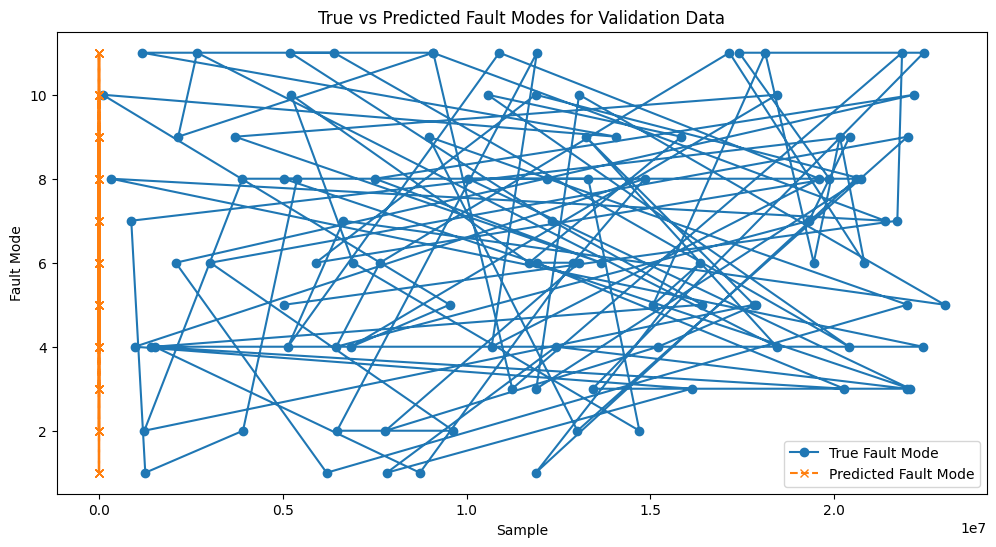

Cross-Validation Scores: [1.   0.98 1.   1.   1.  ]
Mean CV Score: 0.9960000000000001
Standard Deviation of CV Scores: 0.008000000000000007


In [162]:
# After predicting on validation data, visualize the predictions
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label='True Fault Mode', linestyle='-', marker='o')  # Plot true fault modes
    plt.plot(y_pred, label='Predicted Fault Mode', linestyle='--', marker='x')  # Plot predicted fault modes
    plt.title(title)
    plt.xlabel('Sample')
    plt.ylabel('Fault Mode')
    plt.legend()
    plt.show()

# Visualize the predictions on the validation data
plot_predictions(y_val, y_val_pred, 'True vs Predicted Fault Modes for Validation Data')

# Perform cross-validation to assess the model's performance on different subsets of the data
cv_scores = cross_val_score(model, data_sample_features, y_sample, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))

In [ ]:
df
dv
dj
#Command to see data, df is the variable assigned to the imported pandas library

0  \
0 -0.013086 -0.010822 -0.001646  0.014486  0.037404  0.061716  0.087659  0.112960  0.134546  0.154591  0.172093  0.188999  0.203400   
   0.154474  0.185880  0.217502  0.244742  0.270478  0.291275  0.310183  0.326589  0.344090  0.359813  0.375865  0.386907  0.394363   
  -0.211324 -0.208773 -0.209884 -0.212415 -0.213250 -0.205309 -0.190701 -0.170834 -0.148535 -0.127931 -0.110437 -0.095974 -0.083510   
  -0.379137 -0.380200 -0.373663 -0.359502 -0.341372 -0.319433 -0.300265 -0.282852 -0.267155 -0.251777 -0.234646 -0.215683 -0.197054   
  -0.231596 -0.236198 -0.238759 -0.240506 -0.240162 -0.237644 -0.236210 -0.235312 -0.235490 -0.237338 -0.239843 -0.241117 -0.236045   
...                                                                                                                             ...   
  -0.124119 -0.121121 -0.115366 -0.104671 -0.087947 -0.067751 -0.048848 -0.035725 -0.026658 -0.025457 -0.027675 -0.030069 -0.030699   
  -0.169467 -0.162080 -0.148141 -0.126044 -0.098345 -0.068575 -0.042661 -0.023293 -0.011349 -0.003608  0.000949  0.005021  0.005612   
   0.042060  0.068386  0.101277  0.135628  0.169531  0.198513  0.221774  0.236639  0.245233  0.248215  0.246398  0.245380  0.245169   
   0.153437  0.149004  0.144679  0.141362  0.143102  0.148252  0.158811  0.173647  0.193897  0.216753  0.238838  0.259393  0.275826   
  -0.148305 -0.136189 -0.129398 -0.126036 -0.122285 -0.116304 -0.108671 -0.101446 -0.094989 -0.091566 -0.088563 -0.084044 -0.078064   

                                                                                                                           -0.430424  \
0 -0.013086 -0.010822 -0.001646  0.014486  0.037404  0.061716  0.087659  0.112960  0.134546  0.154591  0.172093  0.188999   0.218131   
   0.154474  0.185880  0.217502  0.244742  0.270478  0.291275  0.310183  0.326589  0.344090  0.359813  0.375865  0.386907   0.394998   
  -0.211324 -0.208773 -0.209884 -0.212415 -0.213250 -0.205309 -0.190701 -0.170834 -0.148535 -0.127931 -0.110437 -0.095974  -0.070927   
  -0.379137 -0.380200 -0.373663 -0.359502 -0.341372 -0.319433 -0.300265 -0.282852 -0.267155 -0.251777 -0.234646 -0.215683  -0.178706   
  -0.231596 -0.236198 -0.238759 -0.240506 -0.240162 -0.237644 -0.236210 -0.235312 -0.235490 -0.237338 -0.239843 -0.241117  -0.225759   
...                                                                                                                              ...   
  -0.124119 -0.121121 -0.115366 -0.104671 -0.087947 -0.067751 -0.048848 -0.035725 -0.026658 -0.025457 -0.027675 -0.030069  -0.024761   
  -0.169467 -0.162080 -0.148141 -0.126044 -0.098345 -0.068575 -0.042661 -0.023293 -0.011349 -0.003608  0.000949  0.005021   0.006277   
   0.042060  0.068386  0.101277  0.135628  0.169531  0.198513  0.221774  0.236639  0.245233  0.248215  0.246398  0.245380   0.247428   
   0.153437  0.149004  0.144679  0.141362  0.143102  0.148252  0.158811  0.173647  0.193897  0.216753  0.238838  0.259393   0.285612   
  -0.148305 -0.136189 -0.129398 -0.126036 -0.122285 -0.116304 -0.108671 -0.101446 -0.094989 -0.091566 -0.088563 -0.084044  -0.069334   

                                                                                                                           -0.427879  \
0 -0.013086 -0.010822 -0.001646  0.014486  0.037404  0.061716  0.087659  0.112960  0.134546  0.154591  0.172093  0.188999   0.230205   
   0.154474  0.185880  0.217502  0.244742  0.270478  0.291275  0.310183  0.326589  0.344090  0.359813  0.375865  0.386907   0.387647   
  -0.211324 -0.208773 -0.209884 -0.212415 -0.213250 -0.205309 -0.190701 -0.170834 -0.148535 -0.127931 -0.110437 -0.095974  -0.055182   
  -0.379137 -0.380200 -0.373663 -0.359502 -0.341372 -0.319433 -0.300265 -0.282852 -0.267155 -0.251777 -0.234646 -0.215683  -0.163655   
  -0.231596 -0.236198 -0.238759 -0.240506 -0.240162 -0.237644 -0.236210 -0.235312 -0.235490 -0.237338 -0.239843 -0.241117  -0.209737   
...                                                         

In [ ]:
df[['pin','po','pdmp']]
#Command to see the pin variable from the dataset
#To see more than one variable using multiple encasing brackets

pin        po      pdmp
0        -1.370116 -0.027094  0.092714
1        -1.352096 -0.108993  0.026824
2        -1.276873 -0.215638 -0.031095
3        -1.205551 -0.360907 -0.076524
4        -1.161170 -0.516623 -0.110287
...            ...       ...       ...
23123613 -1.408887  0.508023  0.369022
23123614 -1.387873  0.487681  0.370284
23123615 -1.385506  0.473424  0.357146
23123616 -1.412271  0.461544  0.334690
23123617 -1.455432  0.450348  0.302434

[23123618 rows x 3 columns]

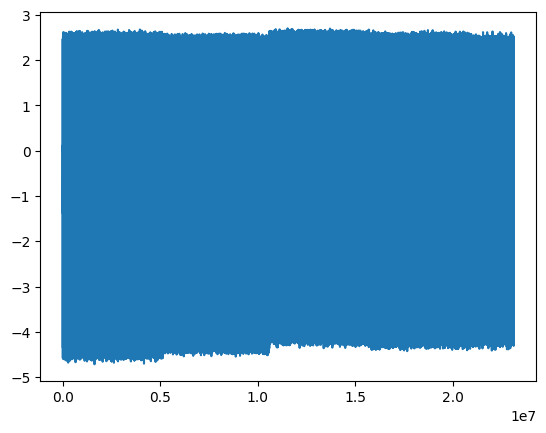

In [ ]:
plt.plot(df['pin'])
#.plot uses matplotlibary, plt is the variable assigned to matplot
#df holds the dataset numbers, hence the df['pin']

In [ ]:
%matplotlib qt5
plt.plot(df['pin'])


In [ ]:
df[df['mode']==2]
#Command to see certain mode data, in this case this means the 2nd failure case for the data set

Unnamed: 0  condition  cycle      pdmp       pin        po  mode
0                  0          1      0  0.092714 -1.370116 -0.027094     2
1                  1          1      0  0.026824 -1.352096 -0.108993     2
2                  2          1      0 -0.031095 -1.276873 -0.215638     2
3                  3          1      0 -0.076524 -1.205551 -0.360907     2
4                  4          1      0 -0.110287 -1.161170 -0.516623     2
...              ...        ...    ...       ...       ...       ...   ...
23119639    23119639          6    993  0.326962 -1.696620  0.098908     2
23119640    23119640          6    993  0.346076 -1.683706  0.058164     2
23119641    23119641          6    993  0.362386 -1.670885 -0.007329     2
23119642    23119642          6    993  0.380449 -1.646132 -0.098683     2
23119643    23119643          6    993  0.393678 -1.603772 -0.218279     2

[2123187 rows x 7 columns]

In [ ]:
#step1 extract condition 1
c1_df = df[df['condition']==1]

#within the condition 1 data values, filter more data by extracting only mode 2 data that is also condition 1
c1_m2 = c1_df[c1_df['mode']==2]



In [ ]:
c1_m2['cycle']

0            0
1            0
2            0
3            0
4            0
          ... 
5147019    999
5147020    999
5147021    999
5147022    999
5147023    999
Name: cycle, Length: 469719, dtype: int64

In [ ]:
np.unique(c1_m2['cycle'])
#Filters data through deleting duplicate numbers

array([   0,    6,   10,   29,   45,   48,   62,   77,  101,  110,  112,
        116,  123,  135,  150,  171,  181,  197,  236,  247,  273,  285,
        321,  346,  369,  384,  387,  401,  459,  477,  486,  487,  500,
        515,  524,  526,  527,  530,  549,  553,  556,  560,  562,  583,
        592,  598,  599,  621,  629,  647,  711,  714,  724,  726,  745,
        761,  767,  774,  782,  787,  807,  809,  810,  813,  816,  829,
        835,  862,  869,  875,  890,  891,  892,  901,  931,  932,  937,
        940,  947,  948,  959,  963,  965,  980,  990,  993,  994,  997,
        998,  999, 1027, 1029, 1040, 1047, 1068, 1086, 1090, 1099, 1102,
       1116, 1132, 1142, 1157, 1183, 1188, 1201, 1212, 1223, 1226, 1231,
       1233, 1235, 1259, 1277, 1293, 1300, 1320, 1324, 1326, 1331, 1338,
       1340, 1361, 1390, 1413, 1415, 1417, 1451, 1462, 1466, 1473, 1485,
       1488, 1489, 1496, 1509, 1513, 1516, 1537, 1541, 1554, 1564, 1565,
       1578, 1588, 1589, 1599, 1600, 1625, 1637, 16

In [ ]:
c1_m2_cy10 = c1_m2[c1_m2['cycle']==10]
#within the condition 1 data values, filter more data by extracting only mode 2 data and cycle 10 data

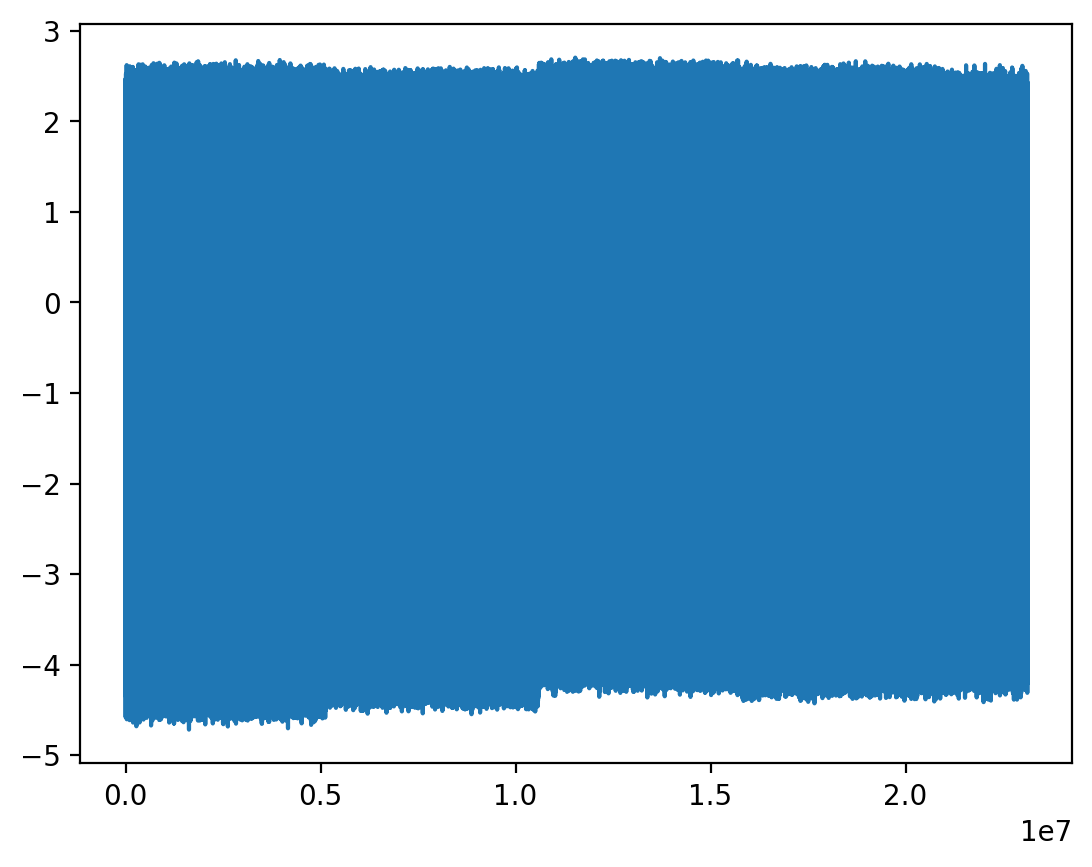

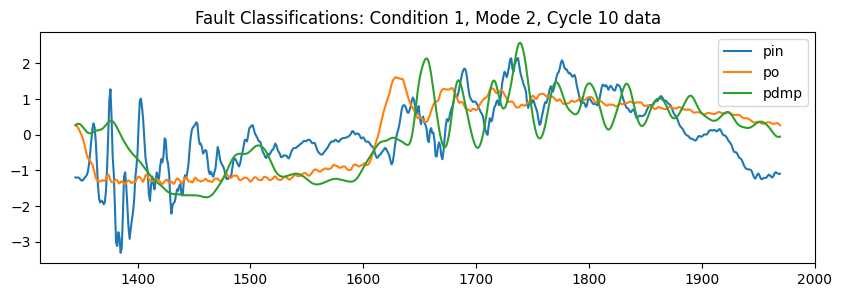

In [ ]:
%matplotlib inline 
#Uses this to see graph in code
plt.figure(figsize=(10,3)) #Changes size of graph
plt.title('Fault Classifications: Condition 1, Mode 2, Cycle 10 data')
plt.plot(c1_m2_cy10['pin'], label='pin') #Command to plot data on a graph, this uses the previous code
plt.plot(c1_m2_cy10['po'], label='po') #Command to plot data on a graph, this uses the previous code
plt.plot(c1_m2_cy10['pdmp'], label='pdmp') #Command to plot data on a graph, this uses the previous code
plt.legend() #Command to have a legend for multiple variables/lines on a graph
plt.show() #Command to show the data plotted on a graph


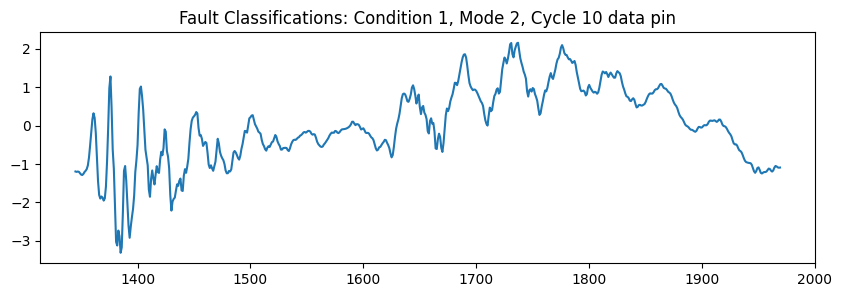

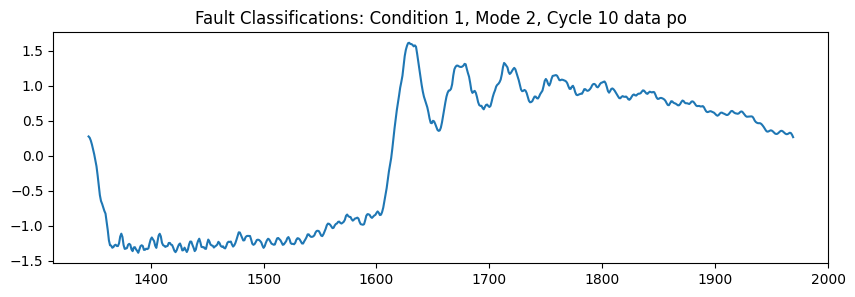

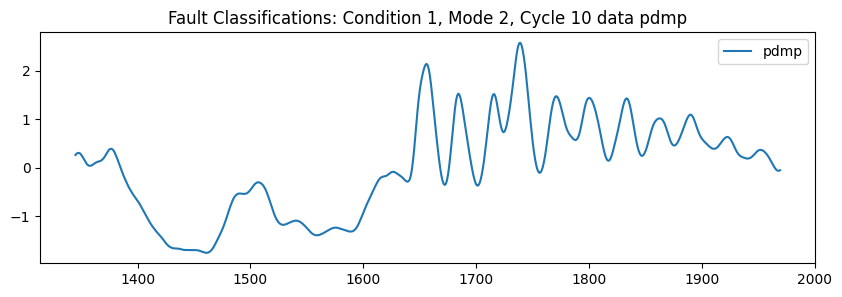

In [ ]:
%matplotlib inline 
#Uses this to see graph in code
plt.figure(figsize=(10,3)) #Changes size of graph
plt.title('Fault Classifications: Condition 1, Mode 2, Cycle 10 data pin')
plt.plot(c1_m2_cy10['pin'], label='pin') #Command to plot data on a graph, this uses the previous code

plt.figure(figsize=(10,3)) #Changes size of graph
plt.title('Fault Classifications: Condition 1, Mode 2, Cycle 10 data po')
plt.plot(c1_m2_cy10['po'], label='po') #Command to plot data on a graph, this uses the previous code

plt.figure(figsize=(10,3)) #Changes size of graph
plt.title('Fault Classifications: Condition 1, Mode 2, Cycle 10 data pdmp')
plt.plot(c1_m2_cy10['pdmp'], label='pdmp') #Command to plot data on a graph, this uses the previous code
plt.legend() #Command to have a legend for multiple variables/lines on a graph
plt.show() #Command to show the data plotted on a graph


In [ ]:
pip install PyQt5
#Install this


SyntaxError: invalid syntax (3810001387.py, line 1)

In [ ]:
pip install scikit-learn seaborn


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.0 MB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 5.6 MB/s eta 0:00:011    |███████                         | 6.7 MB 12.0 MB/s eta 0:00:02
     |████████████████████████████████| 301 kB 8.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
